In [55]:
import pandas as pd
import numpy as np

import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
from sklearn.utils import resample

# ALGOS
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import xgboost as xgb

from sklearn import metrics
from sklearn.utils import resample
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve

import itertools

import warnings

warnings.filterwarnings('ignore')

In [2]:
modelling_df = pd.read_csv('../data/sinave4.csv')

In [3]:
modelling_df.shape

(341990, 74)

In [4]:
# modelling_df.info()

In [5]:
modelling_df['estado'].value_counts(normalize = True)

ACTIVOS LEVES     0.474917
RECUPERADOS       0.451844
FALLECIDOS        0.057241
ACTIVOS GRAVES    0.015998
Name: estado, dtype: float64

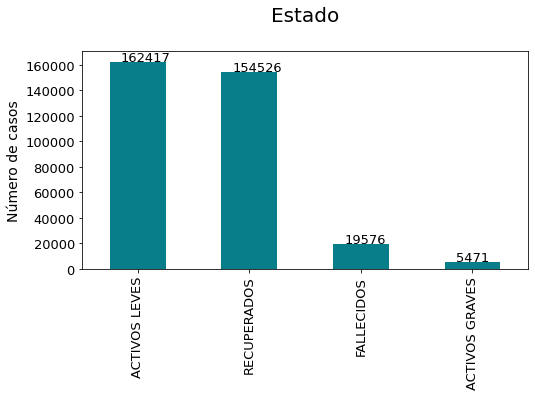

In [6]:
ax = modelling_df['estado'].value_counts().plot(kind='bar', figsize=(8, 4), fontsize=13, color='#087E8B')
ax.set_title('Estado', size=20, pad=30)
ax.set_ylabel('Número de casos', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.10, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=13)

In [7]:
modelling_df3_2cat = modelling_df.copy()

In [8]:
modelling_df3_2cat['estado'].replace(to_replace=['ACTIVOS LEVES', 'RECUPERADOS', 'FALLECIDOS', 'ACTIVOS GRAVES'],value=['RECUPERADOS','RECUPERADOS','FALLECIDOS','FALLECIDOS'],inplace=True)

In [ ]:
# modelling_df3_2cat = modelling_df3_2cat[modelling_df3_2cat["estado"].isin(['RECUPERADOS','FALLECIDOS'])]

In [9]:
modelling_df3_2cat.estado.unique()

array(['RECUPERADOS', 'FALLECIDOS'], dtype=object)

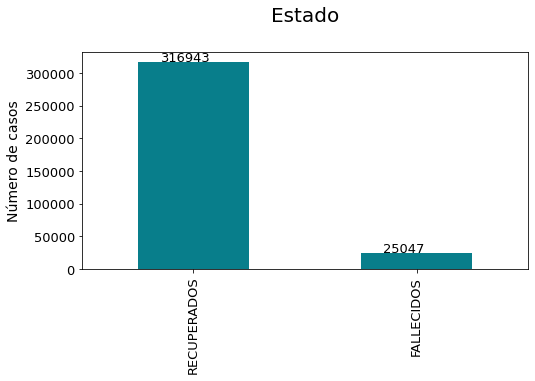

In [10]:
ax = modelling_df3_2cat['estado'].value_counts().plot(kind='bar', figsize=(8, 4), fontsize=13, color='#087E8B')
ax.set_title('Estado', size=20, pad=30)
ax.set_ylabel('Número de casos', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.10, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=13)

In [11]:
# Convert to dummies
modelling_df3_2cat['estado'].replace(to_replace=['RECUPERADOS', 'FALLECIDOS'], 
                                     value=[0,1],inplace=True)

In [12]:
modelling_df3_2cat['sexo'].replace(to_replace=['MASCULINO', 'FEMENINO'], 
                                     value=[1,0],inplace=True)

In [ ]:
# modelling_df3_2cat[''.dropna(axis='rows', inplace = True)

In [ ]:
# modelling_df3_2cat['rango_de_edad'].replace(to_replace=['0-05','06-15','16-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100'],value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)

In [16]:
modelling_df3_2cat_test = modelling_df3_2cat.sample(n=20,random_state=200) #random state is a seed value
modelling_df4_2cat = modelling_df3_2cat.drop(modelling_df3_2cat_test.index)

In [17]:
modelling_df3_2cat_test.shape

(20, 74)

In [18]:
modelling_df4_2cat['estado'].value_counts()

0    316925
1     25045
Name: estado, dtype: int64

# SEMIBALANCED BICLASS

In [ ]:
# sm = SMOTE(random_state = 42)

In [ ]:
# X, y = sm.fit_resample(X, y)

In [19]:
features = ['fiebre', 'tos','odinofagia','disnea','irritabilidad','diarrea','dolor_toracico','calofrios', 'cefalea','mialgias','artralgias','ataque_al_estado_general','rinorrea','polipnea','vomito','dolor_abdominal','conjuntivitis','cianosis','diabetes', 'epoc', 'asma', 'inmunosupresivo','hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca','obesidad', 'insuficiencia_renal_cronica', 'tabaquismo', 'diabetes', 'epoc', 'asma', 'inmunosupresivo',
       'hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca',
       'obesidad', 'insuficiencia_renal_cronica', 'tabaquismo','edad', "sexo"]

In [20]:
X = modelling_df4_2cat[features].copy()
y = modelling_df4_2cat['estado'].copy()

In [21]:
X = np.array(X)

In [22]:
count_class_0 = 60090
count_class_1 = 25045
pipe = make_pipeline(SMOTE(sampling_strategy={1: count_class_1}), NearMiss(sampling_strategy={0: count_class_0}))

X, y = pipe.fit_resample(X, y)

In [23]:
from collections import Counter
counter = Counter(y)

for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=60090 (70.582%)
Class=1, n=25045 (29.418%)


In [24]:
# print('Resampled dataset shape %s' % Counter(y_res))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (68108, 42) (68108,)
Test set: (17027, 42) (17027,)


In [26]:
# estandarizamos los datos

ss = preprocessing.StandardScaler().fit(X_train.astype(np.float))
X_train = ss.transform(X_train.astype(np.float))
X_test = ss.transform(X_test.astype(np.float))

## Logistic Regression Classifier

In [27]:
# Confusion Matrix plotting function
# https://towardsdatascience.com/multi-class-classification-extracting-performance-metrics-from-the-confusion-matrix-b379b427a872

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


In [28]:
# Encuentra los mejores hiperparámetros para logistic regression classifier
#Logistic Regression soporta solo solvers en ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
results_df = pd.DataFrame(index=cs)
results_df.index.name='C'
for s in solvers:
    results = []
    for c in cs:
        LR = LogisticRegression(C=c, solver=s, max_iter=4000, random_state=42).fit(X_train,y_train)
        y_pred = LR.predict(X_test)
        j_score = jaccard_score(y_test, y_pred)
        results.append(j_score)
    results_df[s] = results
results_df

,newton-cg,lbfgs,liblinear,sag,saga
C,,,,,
0.0001,0.593110,0.593110,0.647030,0.593110,0.593110
0.0010,0.642833,0.642833,0.651959,0.642833,0.642833
0.0100,0.650309,0.650309,0.651414,0.650309,0.650309
0.1000,0.651741,0.651741,0.651741,0.651741,0.651741
1.0000,0.652084,0.652084,0.652084,0.652084,0.652084
10.0000,0.652256,0.652256,0.652256,0.652256,0.652256
100.0000,0.652256,0.652256,0.652256,0.652256,0.652256


Confusion matrix, without normalization


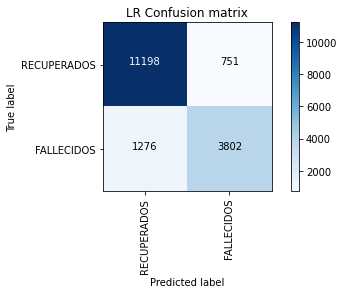

In [31]:
import itertools


# Ejecutamos logistic regression classifier y mostramos resultados

LR = LogisticRegression(C=10.0000, solver='newton-cg', random_state=42).fit(X_train,y_train)
y_pred = LR.predict(X_test)
y_pred_train = LR.predict(X_train)


LR_j_score = jaccard_score(y_test, y_pred)
LR_j_score_train = jaccard_score(y_train, y_pred_train)

LR_f_score = f1_score(y_test, y_pred, average='weighted')
LR_f_score_train = f1_score(y_train, y_pred_train, average='weighted')

LR_class_report = classification_report(y_test, y_pred)
LR_class_report_train = classification_report(y_train, y_pred_train)

LR_dict = classification_report(y_test, y_pred, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RECUPERADOS', 'FALLECIDOS'],normalize=False,  title='LR Confusion matrix')

In [32]:
print('Logistic Regression train jaccard score:', round(LR_j_score_train, 4))
print('Logistic Regression test jaccard score:', round(LR_j_score, 4))

print('\nLogistic Regression TRAIN classification report:\n\n', LR_class_report_train)
print('Logistic Regression TEST classification report:\n\n', LR_class_report)

Logistic Regression train jaccard score: 0.6403
Logistic Regression test jaccard score: 0.6523

Logistic Regression TRAIN classification report:

               precision    recall  f1-score   support

           0       0.90      0.93      0.92     48141
           1       0.82      0.74      0.78     19967

    accuracy                           0.88     68108
   macro avg       0.86      0.84      0.85     68108
weighted avg       0.88      0.88      0.88     68108

Logistic Regression TEST classification report:

               precision    recall  f1-score   support

           0       0.90      0.94      0.92     11949
           1       0.84      0.75      0.79      5078

    accuracy                           0.88     17027
   macro avg       0.87      0.84      0.85     17027
weighted avg       0.88      0.88      0.88     17027



## Decision Tree Classifier

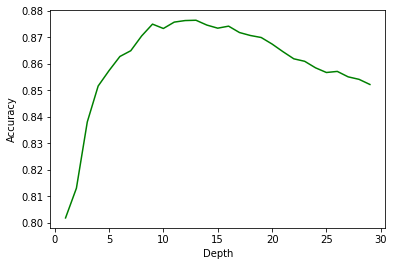

The best accuracy is 0.8764 with depth= 13


In [33]:
depth = 30 #30
mean_acc = np.zeros((depth-1))
for n in range(1,depth): 
    DT = DecisionTreeClassifier(criterion="entropy", max_depth = n, random_state=42).fit(X_train,y_train)
    y_pred=DT.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)
plt.plot(range(1,depth),mean_acc,'g')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.show()
print("The best accuracy is", round(mean_acc.max(), 4), "with depth=", mean_acc.argmax()+1)

Confusion matrix, without normalization


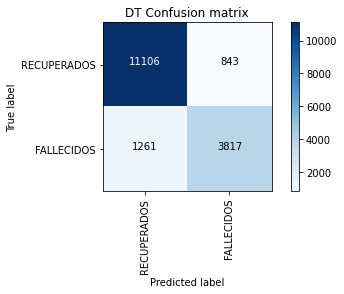

In [34]:
# rejecuta el decision tree classifier y muestra los resultados

DT = DecisionTreeClassifier(criterion="entropy", max_depth = 13, random_state=42).fit(X_train, y_train)
y_pred = DT.predict(X_test)
y_pred_train = DT.predict(X_train)


DT_j_score = jaccard_score(y_test, y_pred)
DT_j_score_train = jaccard_score(y_train, y_pred_train)

DT_f_score = f1_score(y_test, y_pred, average='weighted')
DT_f_score_train = f1_score(y_train, y_pred_train, average='weighted')

DT_class_report = classification_report(y_test, y_pred)
DT_class_report_train = classification_report(y_train, y_pred_train)

DT_dict = classification_report(y_test, y_pred, output_dict=True)
DT_dict_train = classification_report(y_train, y_pred_train, output_dict=True)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RECUPERADOS','FALLECIDOS'],normalize=False,  title='DT Confusion matrix')

In [35]:
print('Decision Tree TRAIN jaccard score:', round(DT_j_score_train, 2),
      '\nDecision Tree TEST jaccard score:', round(DT_j_score, 2))

print('\nDecision Tree TRAIN classification report:\n\n', DT_class_report_train)
print('\nDecision Tree TEST classification report:\n\n', DT_class_report)

Decision Tree TRAIN jaccard score: 0.68 
Decision Tree TEST jaccard score: 0.64

Decision Tree TRAIN classification report:

               precision    recall  f1-score   support

           0       0.91      0.94      0.92     48141
           1       0.83      0.79      0.81     19967

    accuracy                           0.89     68108
   macro avg       0.87      0.86      0.87     68108
weighted avg       0.89      0.89      0.89     68108


Decision Tree TEST classification report:

               precision    recall  f1-score   support

           0       0.90      0.93      0.91     11949
           1       0.82      0.75      0.78      5078

    accuracy                           0.88     17027
   macro avg       0.86      0.84      0.85     17027
weighted avg       0.87      0.88      0.87     17027



## Random Forest Classifier

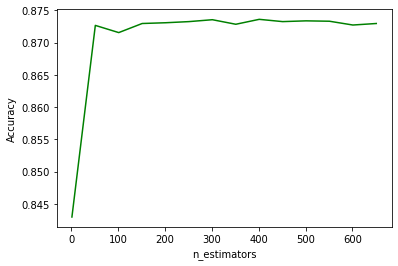

The best accuracy is 0.8736 with n_estimators= 401


In [36]:
depth = 700
mean_acc = np.zeros((depth-1))
for n in range(1,depth,50): 
    RF = RandomForestClassifier(n_estimators = n, random_state = 42).fit(X_train,y_train)
    y_pred = RF.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)
plt.plot(range(1,depth,50),mean_acc[::50],'g')
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.show()
print( "The best accuracy is", round(mean_acc.max(), 4), "with n_estimators=", mean_acc.argmax()+1)

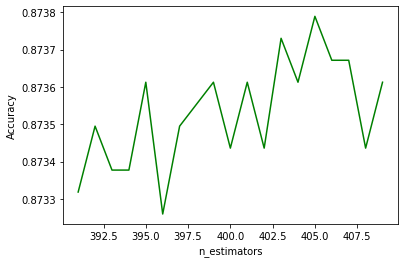

The best accuracy is 0.8738 with n_estimators= 405


In [37]:
depth = 410
mean_acc = np.zeros((depth-1))
# for n in range(1,depth,501): 
for n in range(390,depth): 
    RF = RandomForestClassifier(n_estimators=n, random_state=42).fit(X_train,y_train)
    yhat=RF.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
# plt.plot(range(1,depth,501),mean_acc[::501],'g')
plt.plot(range(391,depth),mean_acc[390:410],'g')
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.show()
print( "The best accuracy is", round(mean_acc.max(), 4), "with n_estimators=", mean_acc.argmax()+1)


Confusion matrix, without normalization


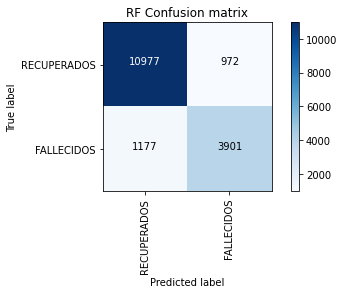

In [38]:
# ejecutar random forest y mostrar resultados

RF = RandomForestClassifier(n_estimators=405, random_state=42).fit(X_train, y_train)
y_pred = RF.predict(X_test)
y_pre_train = RF.predict(X_train)


RF_j_score = jaccard_score(y_test, y_pred)
RF_j_score_train = jaccard_score(y_train, y_pred_train)


RF_f_score = f1_score(y_test, yhat, average='weighted')
RF_f_score_train = f1_score(y_train, y_pred_train, average='weighted')

RF_class_report = classification_report(y_test, y_pred)
RF_class_report_train = classification_report(y_train, y_pred_train)


RF_dict = classification_report(y_test, y_pred, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RECUPERADOS','FALLECIDOS'],normalize=False,  title='RF Confusion matrix')

In [39]:
print('Random Forest Classifier TRAIN jaccard score:', round(RF_j_score_train, 2),
      '\nRandom Forest Classifier TEST jaccard score:', round(RF_j_score, 2))

print('\nRandom Forest Classifier TRAIN classification report:\n\n', RF_class_report_train)
print('\nRandom Forest Classifier TEST classification report:\n\n', RF_class_report)

Random Forest Classifier TRAIN jaccard score: 0.68 
Random Forest Classifier TEST jaccard score: 0.64

Random Forest Classifier TRAIN classification report:

               precision    recall  f1-score   support

           0       0.91      0.94      0.92     48141
           1       0.83      0.79      0.81     19967

    accuracy                           0.89     68108
   macro avg       0.87      0.86      0.87     68108
weighted avg       0.89      0.89      0.89     68108


Random Forest Classifier TEST classification report:

               precision    recall  f1-score   support

           0       0.90      0.92      0.91     11949
           1       0.80      0.77      0.78      5078

    accuracy                           0.87     17027
   macro avg       0.85      0.84      0.85     17027
weighted avg       0.87      0.87      0.87     17027



## K-Nearest Neighbors (KNN) Classifier

In [40]:
# encontrar los mejores hiperparámetros para K-Nearest Neighbors (KNN) Classifier, solo k impar

Ks = 38 #38
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred= KNN.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)
    
    std_acc[n-1]=np.std(y_pred == y_test)/np.sqrt(y_pred.shape[0])

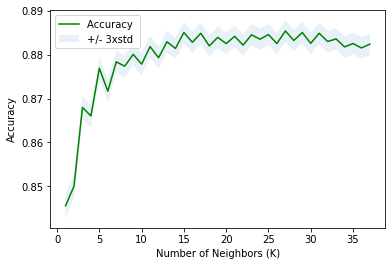

The best accuracy was with 0.8854 with k= 27


In [41]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))

plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.show()
print("The best accuracy was with", round(mean_acc.max(), 4), "with k=", mean_acc.argmax()+1)

Confusion matrix, without normalization


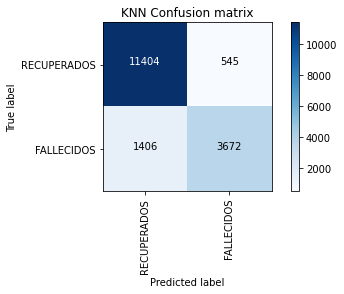

In [43]:
# ejecutar K-Nearest Neighbors (KNN) Classifier y mostrar resultados

KNN = KNeighborsClassifier(n_neighbors = 27).fit(X_train,y_train)
y_pred = KNN.predict(X_test)
y_pred_train = KNN.predict(X_train)


KNN_j_score = jaccard_score(y_test, y_pred)
KNN_j_score_train = jaccard_score(y_train, y_pred_train)


KNN_f_score = f1_score(y_test, y_pred, average='weighted')
KNN_f_score_train = f1_score(y_train, y_pred_train, average='weighted')

KNN_class_report = classification_report(y_test, y_pred)
KNN_class_report_train = classification_report(y_train, y_pred_train)

KNN_dict = classification_report(y_test, y_pred, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RECUPERADOS','FALLECIDOS'],normalize=False,  title='KNN Confusion matrix')

In [44]:
print('KNN jaccard train score:', round(KNN_j_score_train, 4))
print('KNN jaccard test score:', round(KNN_j_score, 4))

print('\nKNN train classification report:\n\n', KNN_class_report_train)
print('KNN test classification report:\n\n', KNN_class_report)

KNN jaccard train score: 0.661
KNN jaccard test score: 0.653

KNN train classification report:

               precision    recall  f1-score   support

           0       0.89      0.96      0.93     48141
           1       0.88      0.73      0.80     19967

    accuracy                           0.89     68108
   macro avg       0.89      0.84      0.86     68108
weighted avg       0.89      0.89      0.89     68108

KNN test classification report:

               precision    recall  f1-score   support

           0       0.89      0.95      0.92     11949
           1       0.87      0.72      0.79      5078

    accuracy                           0.89     17027
   macro avg       0.88      0.84      0.86     17027
weighted avg       0.88      0.89      0.88     17027



## Naive Bayes Classifier

Confusion matrix, without normalization


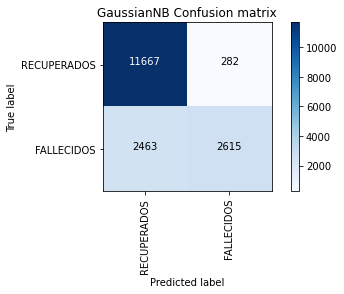

In [46]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)


gnb_j_score = jaccard_score(y_test, y_pred)
gnb_j_score_train = jaccard_score(y_train, y_pred_train)


gnb_f_score = f1_score(y_test, yhat, average='weighted')
gnb_f_score_train = f1_score(y_train, y_pred_train, average='weighted')


gnb_class_report = classification_report(y_test, y_pred)
gnb_class_report_train = classification_report(y_train, y_pred_train)


gnb_dict = classification_report(y_test, y_pred, output_dict=True)
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RECUPERADOS','FALLECIDOS'],normalize=False,  title='GaussianNB Confusion matrix')

In [47]:
print('RF jaccard test score:', round(gnb_j_score, 4))
print('RF jaccard train score:', round(gnb_j_score_train, 4))

print('\nRF classification test report:\n\n', gnb_class_report)
print('RF classification train report:\n\n', gnb_class_report_train)

RF jaccard test score: 0.4879
RF jaccard train score: 0.4821

RF classification test report:

               precision    recall  f1-score   support

           0       0.83      0.98      0.89     11949
           1       0.90      0.51      0.66      5078

    accuracy                           0.84     17027
   macro avg       0.86      0.75      0.78     17027
weighted avg       0.85      0.84      0.82     17027

RF classification train report:

               precision    recall  f1-score   support

           0       0.83      0.98      0.90     48141
           1       0.90      0.51      0.65     19967

    accuracy                           0.84     68108
   macro avg       0.86      0.74      0.77     68108
weighted avg       0.85      0.84      0.82     68108



## Support Vector Machine (SVM) Classifier

Confusion matrix, without normalization


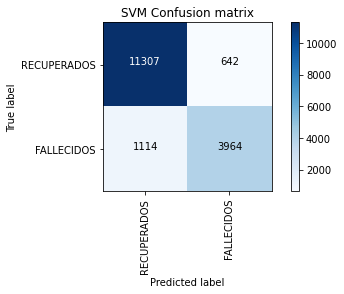

In [50]:
# SVM no funciona bien con conjuntos de datos grandes, por lo que solo usé el kernel 'rbf'

SVM = svm.SVC(kernel='rbf', gamma='auto', random_state=42, probability=True).fit(X_train, y_train)

y_pred = SVM.predict(X_test)
y_pred_train = SVM.predict(X_train)

SVM_j_score = jaccard_score(y_test, y_pred)
SVM_j_score_train = jaccard_score(y_train, y_pred_train)

SVM_f_score = f1_score(y_test, y_pred, average='weighted')
SVM_f_score_train = f1_score(y_train, y_pred_train, average='weighted')


SVM_class_report = classification_report(y_test, y_pred)
SVM_class_report_train = classification_report(y_train, y_pred_train)


SVM_dict = classification_report(y_test, y_pred, output_dict=True)
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RECUPERADOS','FALLECIDOS'],normalize=False,  title='SVM Confusion matrix')

In [83]:
print('SVM jaccard test score:', round(SVM_j_score, 4))
print('SVM jaccard train score:', round(SVM_j_score_train, 4))

print('\nSVM classification test report:\n\n', SVM_class_report)
print('SVM classification train report:\n\n', SVM_class_report_train)

SVM jaccard test score: 0.693
SVM jaccard train score: 0.6982

SVM classification test report:

               precision    recall  f1-score   support

           0       0.91      0.95      0.93     11949
           1       0.86      0.78      0.82      5078

    accuracy                           0.90     17027
   macro avg       0.89      0.86      0.87     17027
weighted avg       0.90      0.90      0.90     17027

SVM classification train report:

               precision    recall  f1-score   support

           0       0.91      0.95      0.93     48141
           1       0.87      0.78      0.82     19967

    accuracy                           0.90     68108
   macro avg       0.89      0.87      0.88     68108
weighted avg       0.90      0.90      0.90     68108



## XGboost Classifier

In [60]:
xg_class = xgb.XGBClassifier()
xg_class.fit(X_train, y_train)

[14:32:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Confusion matrix, without normalization


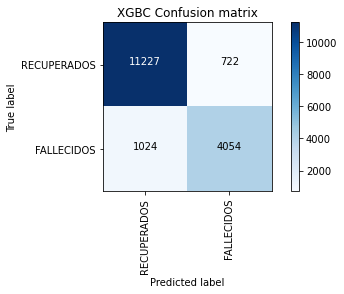

In [61]:
y_pred = xg_class.predict(X_test)
y_pred_train = xg_class.predict(X_train)

xg_class_j_score = jaccard_score(y_test, y_pred)
xg_class_j_score_train = jaccard_score(y_train, y_pred_train)

xg_class_f_score = f1_score(y_test, y_pred, average='weighted')
xg_class_f_score_train = f1_score(y_train, y_pred_train, average='weighted')


xg_class_class_report = classification_report(y_test, y_pred)
xg_class_class_report_train = classification_report(y_train, y_pred_train)


xg_class_dict = classification_report(y_test, y_pred, output_dict=True)
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RECUPERADOS','FALLECIDOS'],normalize=False,  title='XGBC Confusion matrix')

In [62]:
print('XGBC jaccard test score:', round(xg_class_j_score, 4))
print('XGBC jaccard train score:', round(xg_class_j_score_train, 4))

print('\nXGBC classification test report:\n\n', xg_class_class_report)
print('XGBC classification train report:\n\n', xg_class_class_report_train)

XGBC jaccard test score: 0.699
XGBC jaccard train score: 0.7182

XGBC classification test report:

               precision    recall  f1-score   support

           0       0.92      0.94      0.93     11949
           1       0.85      0.80      0.82      5078

    accuracy                           0.90     17027
   macro avg       0.88      0.87      0.88     17027
weighted avg       0.90      0.90      0.90     17027

XGBC classification train report:

               precision    recall  f1-score   support

           0       0.92      0.94      0.93     48141
           1       0.86      0.81      0.84     19967

    accuracy                           0.91     68108
   macro avg       0.89      0.88      0.89     68108
weighted avg       0.91      0.91      0.91     68108



## Results

In [84]:
# get results from all the classifiers to compare

J_results = {'Logistic Regression':round(LR_j_score, 4),
             'Decision Tree':round(DT_j_score, 4),
             'Random Forest':round(RF_j_score, 4),
             'K-Nearest Neighbors':round(KNN_j_score, 4),             
             'Naive Bayes':round(gnb_j_score,4),
             'Support Vector Machine':round(SVM_j_score, 4),
             'XGBC classification':round(xg_class_f_score, 4)}

F_results = {'Logistic Regression':round(LR_f_score, 4),
             'Decision Tree':round(DT_f_score, 4),
             'Random Forest':round(RF_f_score, 4),
             'K-Nearest Neighbors':round(KNN_f_score, 4),             
             'Naive Bayes':round(gnb_f_score,4),
             'Support Vector Machine':round(SVM_f_score, 4),
             'XGBC classification':round(xg_class_f_score, 4),
             'Support Vector Machine':round(SVM_f_score, 4)}

Class_F1_results = {'Logistic Regression':round(LR_dict['0']['f1-score'], 4),
                    'Decision Tree':round(DT_dict['0']['f1-score'], 4),
                    'Random Forest':round(RF_dict['0']['f1-score'], 4),
                    'Naive Bayes':round(gnb_dict['0']['f1-score'],4),
                    'K-Nearest Neighbors':round(KNN_dict['0']['f1-score'], 4),
                    'Support Vector Machine':round(SVM_dict['0']['f1-score'], 4),
                    'XGBC classification':round(xg_class_dict['0']['f1-score'], 4)}


Class_Recall_results = {'Logistic Regression':round(LR_dict['0']['recall'], 4),
                        'Decision Tree':round(DT_dict['0']['recall'], 4),
                        'Random Forest':round(RF_dict['0']['recall'], 4),
                        'Naive Bayes':round(gnb_dict['0']['recall'],4),
                        'K-Nearest Neighbors':round(KNN_dict['0']['recall'], 4),
                        'Support Vector Machine':round(SVM_dict['0']['recall'], 4),
                        'XGBC classification':round(xg_class_dict['0']['recall'], 4)}

In [85]:
final_results = pd.DataFrame([J_results,F_results,Class_F1_results,Class_Recall_results],
                        index=['Jaccard Score','F1 Score','Fallecido Class F1 Score','Fallecido Class Recall Score'])
final_results

,Logistic Regression,Decision Tree,Random Forest,K-Nearest Neighbors,Naive Bayes,Support Vector Machine,XGBC classification
Jaccard Score,0.6523,0.6447,0.6448,0.6530,0.4879,0.6930,0.8965
F1 Score,0.8790,0.8748,0.8729,0.8821,0.8729,0.8954,0.8965
Fallecido Class F1 Score,0.9170,0.9135,0.9108,0.9212,0.8947,0.9279,0.9279
Fallecido Class Recall Score,0.9371,0.9295,0.9187,0.9544,0.9764,0.9463,0.9396


[17:57:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


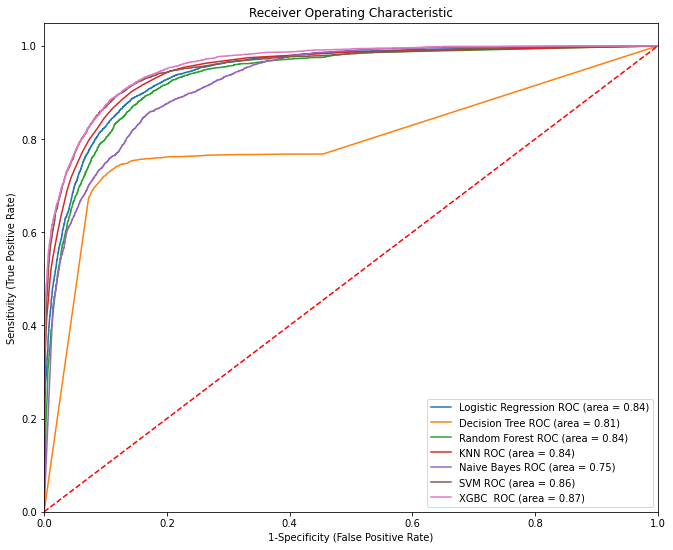

In [67]:
# Define the models you want to use
models = [
 {'label': 'Logistic Regression', 'model': LogisticRegression(C=10.0000, solver='newton-cg', random_state=42)},
    {'label': 'Decision Tree', 'model': DecisionTreeClassifier(criterion="entropy", max_depth = 29, random_state=42)},
    {'label': 'Random Forest', 'model': RandomForestClassifier(n_estimators=601, random_state=42)},
    {'label': 'KNN', 'model': KNeighborsClassifier(n_neighbors = 31)},    
    {'label': 'Naive Bayes', 'model': GaussianNB()},
    {'label': 'SVM', 'model': svm.SVC(kernel='rbf', gamma='auto', random_state=42, probability=True)},
    {'label': 'XGBC ', 'model': xgb.XGBClassifier()}
]

# Define the size of the figure
plt.figure(figsize = [11,9])


for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])  
    auc = metrics.roc_auc_score(y_test,model.predict(X_test)) 
    plt.plot(fpr, tpr, label ='%s ROC (area = %0.2f)' % (m['label'], auc)) 
        
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

In [68]:
final_model = xgb.XGBClassifier().fit(X_train, y_train)

[20:00:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [69]:
final_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
importances = final_model.feature_importances_
feature_importances = []
for feature, score in zip(features, importances):
    feature_importances.append([feature, round(score, 2)])
feature_importances_df = pd.DataFrame(sorted(feature_importances, key=lambda x:x[1], reverse=True),
                                columns=['Factores','Importance Score'])
feature_importances_df

,Factores,Importance Score
0,disnea,0.30
1,dolor_abdominal,0.05
2,diabetes,0.05
3,otra_condicion,0.05
4,tabaquismo,0.05
5,polipnea,0.04
6,obesidad,0.04
7,insuficiencia_renal_cronica,0.04
8,ataque_al_estado_general,0.03
9,vomito,0.03


In [72]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample

In [ ]:
xgbc = xgb.XGBClassifier()

In [73]:
space = {
    
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 25), # uniforme discreta de 10 a 1000 en saltos de 25
    
    'learning_rate': hp.uniform('learning_rate', 0.0001, 1.0), # uniforme continua entre 0.0001 y 1
    
    'gamma': hp.uniform('x_gamma', 0.1, 0.5)
}

In [76]:
def objetivo(space):
    
    modelo = xgb.XGBClassifier(n_estimators=int(space['n_estimators']),
                            learning_rate=space['learning_rate'],
                            gamma = space['gamma'],
                            objective='binary:logistic'
                           )
    
    eval_set = [(X_train, y_train), (X_test, y_test)]
    
    modelo.fit(X_train, y_train, eval_set = eval_set, verbose=False)
    
    y_pred = modelo.predict(X_test)
    
    acc_boost = metrics.accuracy_score(y_test, y_pred)
    
    return {'loss': acc_boost, 'status': STATUS_OK}

In [77]:
mejor = fmin(fn = objetivo, space = space, algo = tpe.suggest, max_evals=10, trials=Trials())

mejor

[21:37:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

{'learning_rate': 0.7695026670809882,
 'n_estimators': 500.0,
 'x_gamma': 0.3025686841724259}

In [78]:
modelo=xgb.XGBClassifier(n_estimators=int(mejor['n_estimators']), 
                       learning_rate=mejor['learning_rate'], 
                       gamma=mejor['x_gamma'],
                       objective='binary:logistic')

In [ ]:
# modelo.fit(X_train, y_train)

[08:05:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix, without normalization


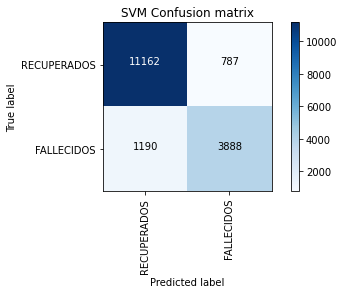

In [80]:
# XGBC no funciona bien con conjuntos de datos grandes, por lo que solo usé el kernel 'rbf'

XGBC = modelo.fit(X_train, y_train)

y_pred = XGBC.predict(X_test)
y_pred_train = XGBC.predict(X_train)

XGBC_j_score = jaccard_score(y_test, y_pred)
XGBC_j_score_train = jaccard_score(y_train, y_pred_train)

XGBC_f_score = f1_score(y_test, y_pred, average='weighted')
XGBC_f_score_train = f1_score(y_train, y_pred_train, average='weighted')


XGBC_class_report = classification_report(y_test, y_pred)
XGBC_class_report_train = classification_report(y_train, y_pred_train)


XGBC_dict = classification_report(y_test, y_pred, output_dict=True)
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RECUPERADOS','FALLECIDOS'],normalize=False,  title='SVM Confusion matrix')

In [82]:
print('XGBC jaccard test score:', round(XGBC_j_score, 4))
print('XGBC jaccard train score:', round(XGBC_j_score_train, 4))

print('\nXGBC classification test report:\n\n', XGBC_class_report)
print('XGBC classification train report:\n\n', XGBC_class_report_train)

XGBC jaccard test score: 0.6629
XGBC jaccard train score: 0.7869

XGBC classification test report:

               precision    recall  f1-score   support

           0       0.90      0.93      0.92     11949
           1       0.83      0.77      0.80      5078

    accuracy                           0.88     17027
   macro avg       0.87      0.85      0.86     17027
weighted avg       0.88      0.88      0.88     17027

XGBC classification train report:

               precision    recall  f1-score   support

           0       0.94      0.97      0.95     48141
           1       0.92      0.84      0.88     19967

    accuracy                           0.93     68108
   macro avg       0.93      0.91      0.92     68108
weighted avg       0.93      0.93      0.93     68108



In [86]:
importances = XGBC.feature_importances_
feature_importances = []
for feature, score in zip(features, importances):
    feature_importances.append([feature, round(score, 2)])
feature_importances_df = pd.DataFrame(sorted(feature_importances, key=lambda x:x[1], reverse=True),
                                columns=['Factores','Importance Score'])
feature_importances_df

,Factores,Importance Score
0,disnea,0.20
1,enfermedad_cardiaca,0.12
2,insuficiencia_renal_cronica,0.08
3,otra_condicion,0.06
4,inmunosupresivo,0.05
5,diabetes,0.04
6,epoc,0.04
7,asma,0.04
8,hipertension,0.04
9,tabaquismo,0.04
